# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python
print("Done")

Done


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [7]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    #print("\n\nNext State")
    #print(next_state)
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: -1.0


When finished, you can close the environment.

In [8]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

### Solutions
    This model uses a Deep Q Neural network which was is similar to the one used in the spaceship landing game. This agent has a replay buffer of 10000 and uses three fully connected layers along with an input and output layer. The network is structured as follows: input layer (37 nodes) -> 128 Fully Connected Nodes -> 512 fully connected nodes -> 128 fully connected nodes -> output layer (4). I originally tried just giving the network two fully connected layers of 64 nodes but this did not seem to easily learn the network and got stuck around 11 or so points when playing. This was probably due to a lack of nodes as there are 37 inputs. As such I increased it to three layers of 128, 512, and 128 again. 
    
    I decided to keep the same hyperparameters from the example given to us in the spaceship lander as it seemed to have a good learning rate of `5e-4`, a discount factor of .99, batch size of 64 and updated at an interval of every 4 actions, along with a soft update parameter of 1e-3. In addition to this the neural network used an adam optimizer. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np
# reset the environment
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]

import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.from_numpy(state).float().unsqueeze(0).to(device))
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
tensor([[ 1.0000,  0.0000,  0.0000,  0.0000,  0.8441,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0748,  0.0000,  1.0000,  0.0000,  0.0000,
          0.2576,  1.0000,  0.0000,  0.0000,  0.0000,  0.7418,  0.0000,
          1.0000,  0.0000,  0.0000,  0.2585,  0.0000,  0.0000,  1.0000,
          0.0000,  0.0936,  0.0000,  1.0000,  0.0000,  0.0000,  0.3197,
          0.0000,  0.0000]], device='cuda:0')
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


Episode 100	Average Score: 0.61
Episode 200	Average Score: 3.34
Episode 300	Average Score: 7.83
Episode 400	Average Score: 10.53
Episode 497	Average Score: 13.08
Environment solved in 397 episodes!	Average Score: 13.08


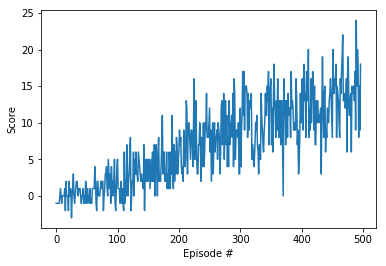

In [4]:
from agent import Agent
from collections import deque
import matplotlib.pyplot as plt

env_info = env.reset(train_mode=True)[brain_name]
ml_agent = Agent(state_size, action_size, 0)

def train_deep_q_network(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=.995):
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    
    for i_episode in range(1, n_episodes+1):
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]
        score = 0
        while True:
            action = ml_agent.act(state, eps)
            environment_state = env.step(action)[brain_name]
            next_state = environment_state.vector_observations[0]
            reward = environment_state.rewards[0]

            done = environment_state.local_done[0]
            ml_agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 

        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(ml_agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = train_deep_q_network()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Improvement
To improve this network I could probably experiment more with the hyperparameters in order to find more optimal values for each variable. This could definitely allow for the network to solve the problem more effectively as it could capture more hidden nuances of the game. In addition to this I could also do some normalization of some of the inputs as some of the inputs have odd ranges which may not allow the network to generalize well. Implementing double dqn, dueling dqn, or adding prioritized experience replay could also definitely help to improve the network's ability to learn the environment.